<a href="https://colab.research.google.com/github/MariangelV/Diplomado-Ciencia-de-Datos/blob/main/Trabajo_final_de_diplomado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

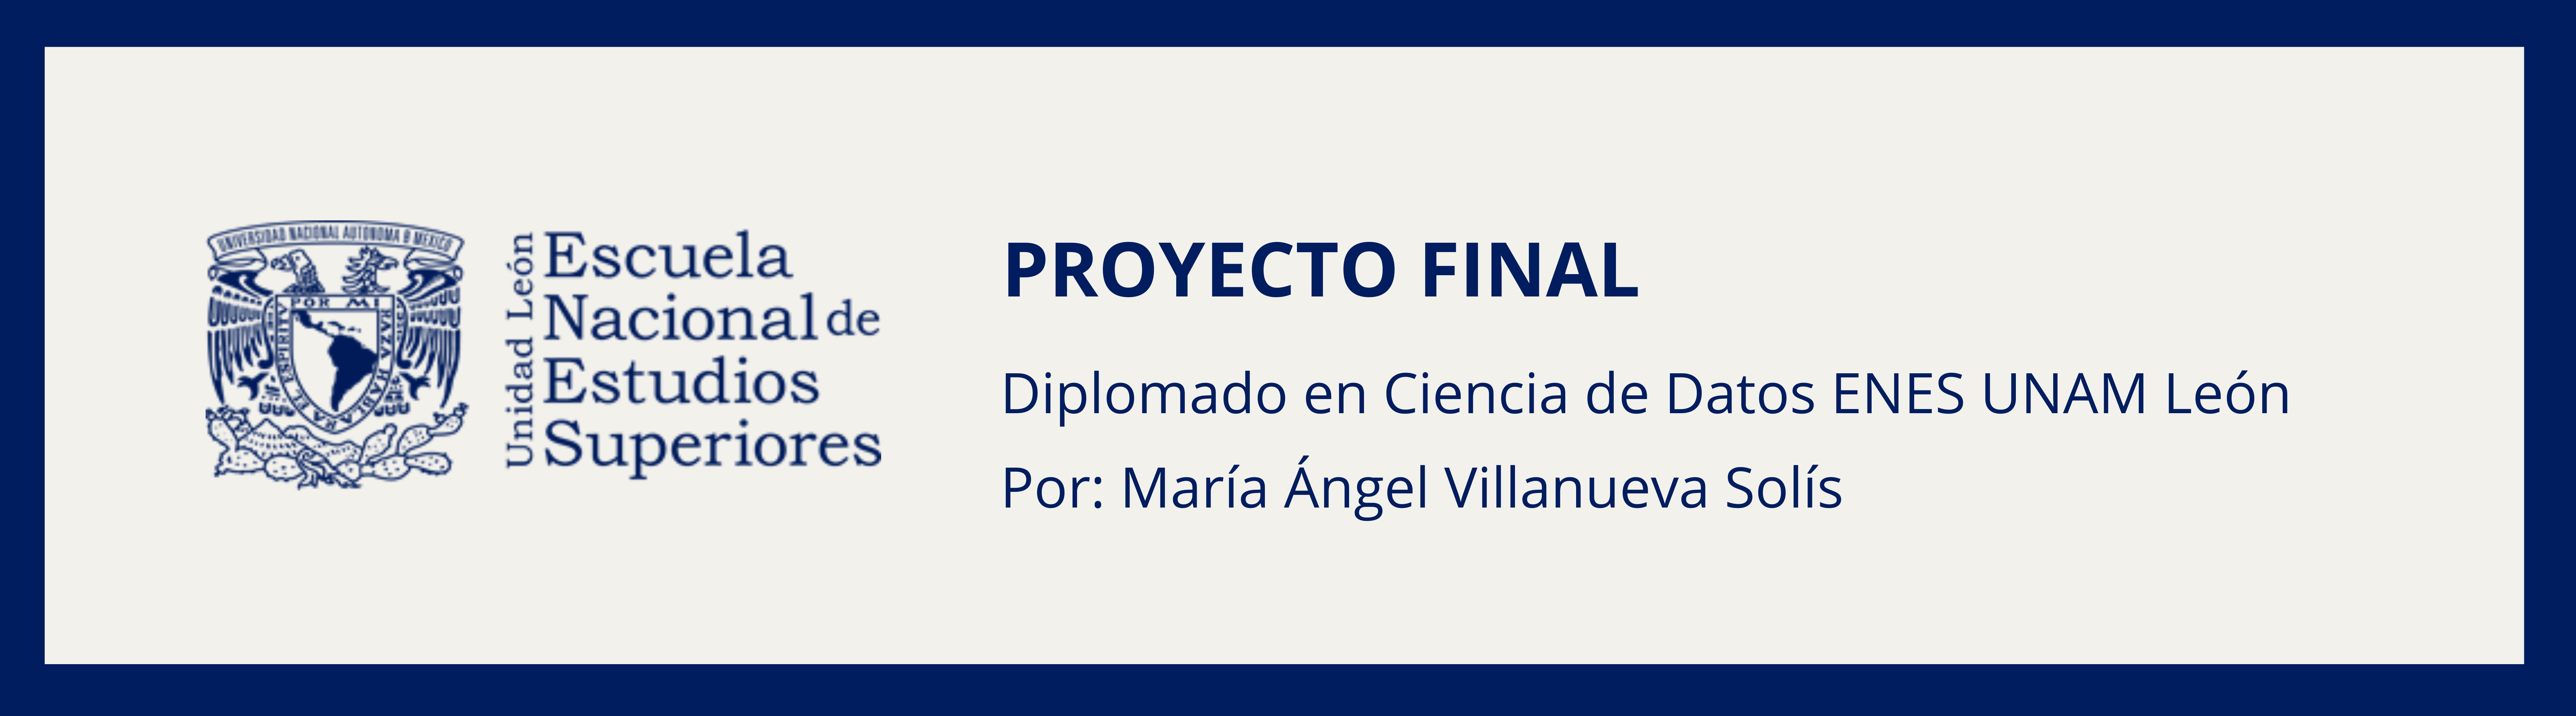

# **Análisis y Modelado de Donativos en Organizaciones Sin Fines de Lucro**

# **Introducción**

> Las organizaciones sin fines de lucro dependen en gran medida de los donativos para financiar sus actividades y maximizar su impacto social. Sin embargo, los patrones de donación varían significativamente entre diferentes sectores, tamaños de organizaciones y factores financieros. En este contexto, surge la necesidad de comprender las dinámicas de financiamiento que permiten a estas organizaciones recibir mayores aportaciones y sostenerse a largo plazo.




> A pesar de los esfuerzos de recaudación de fondos, muchas organizaciones carecen de una comprensión clara de los factores que influyen en los donativos que reciben. No está del todo claro qué sectores reciben más aportaciones, cómo el tamaño de la organización afecta sus gastos de recaudación y qué variables financieras contribuyen al aumento de los ingresos por donativos. Además, sin una herramienta predictiva, es difícil para estas organizaciones anticipar los patrones de financiamiento futuros y planificar estrategias efectivas de recaudación de fondos.




Este proyecto analiza y modela los donativos recibidos por organizaciones sin fines de lucro en Estados Unidos, proporcionando una visión profunda de los patrones de financiamiento en diferentes sectores.


# **Objetivos**

> Identificar las áreas que reciben mayores aportaciones, explorar la relación entre el tamaño de las organizaciones y sus gastos en recaudación, y evaluar la influencia de factores financieros en los donativos.
Concluyendo con un modelo predictivo que permita conocer los ingresos de las organizaciones.



# **Recursos**

> A lo largo del proyecto se implementan varios modelos predictivos, incluyendo Random Forest, Gradient Boosting y una Red Neuronal Artificial (ANN), con el fin de prever las tendencias de donaciones. Las visualizaciones, junto con los resultados de los modelos, proporcionan un enfoque basado en datos que puede orientar las estrategias de recaudación y optimización de recursos en el sector sin fines de lucro.

# **Tecnologías Utilizadas**

> **Google Colab:** Utilizado para el desarrollo y pruebas iniciales de código, facilitando la exploración de datos y el desarrollo del modelo en un entorno basado en la nube.

> **Python:** Lenguaje de programación principal para todo el análisis y desarrollo del modelo, permitiendo la manipulación de datos, visualización, y el uso de técnicas de machine learning.

> **Bibliotecas de Python:** Usadas para la carga, manipulación y análisis de datos, crear visualizaciones de los datos, como gráficos de distribución, histogramas y gráficos de caja y bigote, implementación de modelos de machine learning, incluyendo Random Forest, Gradient Boosting, y redes neuronales artificiales (ANN).

> **Streamlit:** Framework para desarrollar y desplegar el dashboard interactivo, lo que permite a los usuarios explorar visualizaciones y ajustar parámetros en tiempo real.

> **Visual Studio Code (VS Code):** Utilizado para escribir y organizar el código de manera estructurada en un entorno local.

> **Terminal de macOS:** Utilizada para ejecutar comandos de instalación de bibliotecas y ejecutar el dashboard de Streamlit.

# **Obtención y limpieza de datos**

>La fuente de datos de este estudio es Charity Navigator, una organización reconocida por evaluar organizaciones benéficas en los Estados Unidos. Charity Navigator opera como una entidad 501(c)(3) sin fines de lucro, sin aceptar publicidad ni donativos de las organizaciones evaluadas.

> Los datos fueron obtenidos del sitio Kaggle, donde se encuentran disponibles como un servicio público de Charity Navigator. Esta información fue recopilada mediante web scraping en mayo de 2019 y contiene principalmente evaluaciones de 2017.

> **Limpieza de datos:** Se convirtieron las variables a su tipo correcto y se eliminaron duplicados y valores nulos

In [33]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
df=pd.read_csv("charity_data.csv")

In [35]:
df

,ascore,category,description,ein,tot_exp,admin_exp_p,fund_eff,fund_exp_p,program_exp_p,fscore,...,motto,name,tot_rev,score,state,subcategory,size,program_exp,fund_exp,admin_exp
0,100.0,Environment,Working with Oregonians to enhance our quality...,93-0642086,917313.0,0.101,0.18,0.184,0.714,88.61,...,Great communities. Working lands. Iconic Places.,1000 Friends of Oregon,1022513.0,91.94,OR,Environmental Protection and Conservation,small,6.549615e+05,168785.592,92648.613
1,89.0,"Arts, Culture, Humanities",Serving the metropolitan Baltimore area and th...,31-1770828,5053059.0,0.231,0.05,0.032,0.735,82.85,...,88.1 FM -. Your NPR News Station,WYPR,5685761.0,85.59,MD,Public Broadcasting and Media,mid,3.713998e+06,161697.888,1167256.629
2,70.0,Religion,VSS Catholic Communications is dedicated to an...,91-1857425,1891500.0,0.114,0.17,0.197,0.687,86.74,...,Spirit Catholic Radio Network,VSS Catholic Communications,2140836.0,76.80,NE,Religious Media and Broadcasting,small,1.299460e+06,372625.500,215631.000
3,93.0,"Arts, Culture, Humanities",The mission of the Utah Symphony & Opera is to...,51-0145980,22506582.0,0.092,0.08,0.054,0.852,91.03,...,"Engaging, educating, and enriching lives",Utah Symphony & Opera,22203175.0,91.95,UT,Performing Arts,big,1.917561e+07,1215355.428,2070605.544
4,100.0,Human Services,"Funded solely by the footwear industry, Two Te...",22-2579809,5594243.0,0.126,0.12,0.122,0.750,86.23,...,Shoepeople Helping Shoepeople,Two Ten Footwear Foundation,6935506.0,90.26,MA,Social Services,mid,4.195682e+06,682497.646,704874.618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8403,92.0,"Arts, Culture, Humanities","Founded in 1900, Yaddo is an artists' communit...",14-1343055,3283832.0,0.231,0.22,0.196,0.572,71.94,...,Nurturing the creative process,Yaddo,3296070.0,79.36,NY,Performing Arts,small,1.878352e+06,643631.072,758565.192
8404,59.0,Religion,Yad L'Achim was established in 1950. It is a n...,23-7126417,1387396.0,0.147,0.27,0.285,0.567,60.71,...,Promoting the adherence to Orthodox Jewish obs...,Yad L'Achim Peyle Israel,1446929.0,59.84,NY,Religious Activities,small,7.866535e+05,395407.860,203947.212
8405,100.0,Human Services,Yad Ezra opened its doors in 1990 with the pur...,38-2904733,2419474.0,0.061,0.04,0.052,0.885,83.13,...,Feeding the Jewish hungry,Yad Ezra,2442069.0,88.07,MI,"Food Banks, Food Pantries, and Food Distribution",small,2.141234e+06,125812.648,147587.914
8406,100.0,Human Services,"Rawhide, where commitment and compassion meet....",39-1052471,14606304.0,0.128,0.12,0.073,0.797,95.64,...,Dedicated to helping at-risk youth and their f...,Rawhide,12608419.0,96.91,WI,"Youth Development, Shelter, and Crisis Services",big,1.164122e+07,1066260.192,1869606.912


**Limpieza de datos**

> Los datos fueron limpiados de valores nulos y se ajustaron los tipos de datos según fue necesario.

> Las columnas leader_comp y leader_comp_p tenían valores nulos que fueron rellenados con la media, y la columna motto fue completada con "No motto" en los casos faltantes.

In [36]:
# Revisar valores nulos y tipos de datos
print(df.info())
df = df.dropna()  # Eliminar filas con valores nulos
df = df.drop_duplicates()  # Eliminar duplicados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8408 entries, 0 to 8407
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ascore         8408 non-null   float64
 1   category       8408 non-null   object 
 2   description    8408 non-null   object 
 3   ein            8408 non-null   object 
 4   tot_exp        8408 non-null   float64
 5   admin_exp_p    8408 non-null   float64
 6   fund_eff       8408 non-null   float64
 7   fund_exp_p     8408 non-null   float64
 8   program_exp_p  8408 non-null   float64
 9   fscore         8408 non-null   float64
 10  leader         8408 non-null   object 
 11  leader_comp    7972 non-null   float64
 12  leader_comp_p  7972 non-null   float64
 13  motto          8394 non-null   object 
 14  name           8408 non-null   object 
 15  tot_rev        8408 non-null   float64
 16  score          8408 non-null   float64
 17  state          8408 non-null   object 
 18  subcateg

In [37]:
# Verificar y convertir solo las columnas que existen en el DataFrame
for col in ['donativos', 'gastos_recaudacion', 'puntaje_financiero', 'puntaje_responsabilidad']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Eliminar filas con errores de conversión (valores NaN generados por 'coerce')
df = df.dropna()

# Estadísticas descriptivas iniciales
print(df.describe())


            ascore       tot_exp  admin_exp_p     fund_eff   fund_exp_p  \
count  7959.000000  7.959000e+03  7959.000000  7959.000000  7959.000000   
mean     91.415881  1.510022e+07     0.105557     0.107873     0.087426   
std       8.970487  7.129450e+07     0.062587     0.086475     0.062601   
min      28.000000  1.178580e+05     0.001000     0.010000     0.001000   
25%      89.000000  2.020445e+06     0.063000     0.050000     0.046000   
50%      93.000000  3.809210e+06     0.095000     0.090000     0.078000   
75%      97.000000  9.297610e+06     0.135000     0.140000     0.115000   
max     100.000000  3.142984e+09     0.742000     1.430000     0.916000   

       program_exp_p       fscore   leader_comp  leader_comp_p       tot_rev  \
count    7959.000000  7959.000000  7.959000e+03    7959.000000  7.959000e+03   
mean        0.805515    86.100789  1.641058e+05       0.039045  1.650035e+07   
std         0.092026     9.440717  1.452499e+05       0.034742  7.759609e+07   
min 

In [56]:
# Imputación de valores nulos para columnas numéricas (rellenado con la media)
df['leader_comp'].fillna(df['leader_comp'].mean(), inplace=True)
df['leader_comp_p'].fillna(df['leader_comp_p'].mean(), inplace=True)

# Para los valores de 'motto', completaremos con un valor indicativo de ausencia de lema
df['motto'].fillna('No motto', inplace=True)

# Verificar nuevamente si hay valores nulos después de la imputación
missing_values_after_imputation = df.isnull().sum()

# Mostrar datos limpios y continuar con el análisis exploratorio
missing_values_after_imputation, df.describe()


(ascore           0
 category         0
 description      0
 ein              0
 tot_exp          0
 admin_exp_p      0
 fund_eff         0
 fund_exp_p       0
 program_exp_p    0
 fscore           0
 leader           0
 leader_comp      0
 leader_comp_p    0
 motto            0
 name             0
 tot_rev          0
 score            0
 state            0
 subcategory      0
 size             0
 program_exp      0
 fund_exp         0
 admin_exp        0
 dtype: int64,
             ascore       tot_exp  admin_exp_p     fund_eff   fund_exp_p  \
 count  7959.000000  7.959000e+03  7959.000000  7959.000000  7959.000000   
 mean     91.415881  1.510022e+07     0.105557     0.107873     0.087426   
 std       8.970487  7.129450e+07     0.062587     0.086475     0.062601   
 min      28.000000  1.178580e+05     0.001000     0.010000     0.001000   
 25%      89.000000  2.020445e+06     0.063000     0.050000     0.046000   
 50%      93.000000  3.809210e+06     0.095000     0.090000     0.078

# **Análisis exploratorio de datos**

> Con la finalidad de responder las preguntas planteadas, incluyendo la distribución de las donaciones, rangos de donativos, y sectores con mayor recepción de fondos.

**1. Distribución de donaciones**

> La mayoría de las organizaciones tienen donativos relativamente bajos, pero existen valores atípicos con ingresos muy altos.


In [55]:
print(df.columns)

Index(['ascore', 'category', 'description', 'ein', 'tot_exp', 'admin_exp_p',
       'fund_eff', 'fund_exp_p', 'program_exp_p', 'fscore', 'leader',
       'leader_comp', 'leader_comp_p', 'motto', 'name', 'tot_rev', 'score',
       'state', 'subcategory', 'size', 'program_exp', 'fund_exp', 'admin_exp'],
      dtype='object')


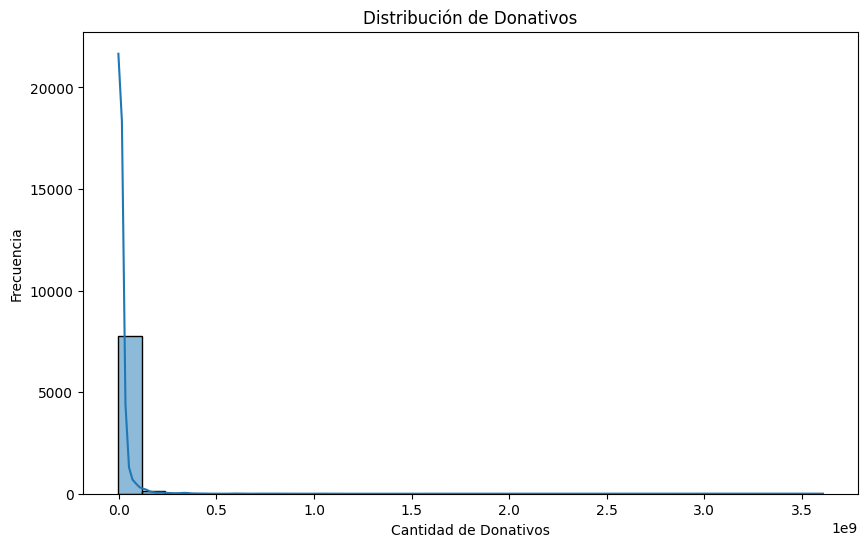

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['tot_rev'], bins=30, kde=True)  # Usa el nombre correcto de la columna
plt.title('Distribución de Donativos')
plt.xlabel('Cantidad de Donativos')
plt.ylabel('Frecuencia')
plt.show()


In [58]:
print(df['tot_rev'].head())  # Cambia 'tot_rev' al nombre correcto de tu columna


0     1022513.0
1     5685761.0
2     2140836.0
3    22203175.0
4     6935506.0
Name: tot_rev, dtype: float64


**2. Rango de Donativos Más Grandes:**

* 75º percentil: 9.8 millones
* 90º percentil: 27.3 millones
* 95º percentil: 56.4 millones
* 99º percentil: 184.7 millones


In [59]:
# Rango de los donativos más grandes
top_donativos = df['tot_rev'].quantile([0.75, 0.9, 0.95, 0.99])  # Cambia 'tot_rev' por el nombre correcto de tu columna
print("Rangos de los donativos más grandes:")
print(top_donativos)


Rangos de los donativos más grandes:
0.75    1.027310e+07
0.90    2.939106e+07
0.95    6.030131e+07
0.99    2.023063e+08
Name: tot_rev, dtype: float64


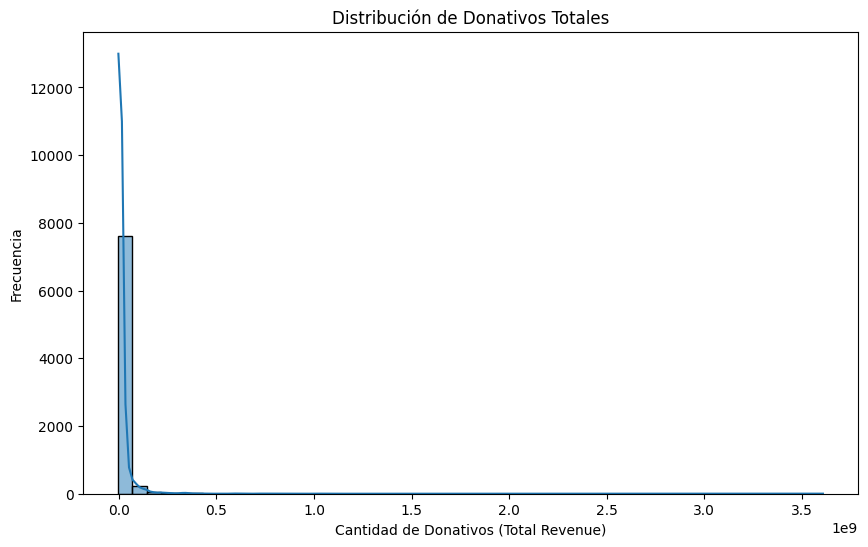

,tot_rev
0.75,1.027310e+07
0.90,2.939106e+07
0.95,6.030131e+07
0.99,2.023063e+08


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización de la distribución de los donativos
plt.figure(figsize=(10, 6))
sns.histplot(df['tot_rev'], bins=50, kde=True)
plt.title('Distribución de Donativos Totales')
plt.xlabel('Cantidad de Donativos (Total Revenue)')
plt.ylabel('Frecuencia')
plt.show()

# Rango de los donativos más grandes (percentiles)
top_donativos = df['tot_rev'].quantile([0.75, 0.9, 0.95, 0.99])
top_donativos


**3. Áreas o sectores que reciben mayores donaciones**

> Los sectores que reciben mayores donativos son:
* Human Services: 36.4 mil millones
* International: 24.4 mil millones
* Arts, Culture, Humanities: 16.7 mil millones
* Community Development: 14.6 mil millones
* Health: 13.6 mil millones

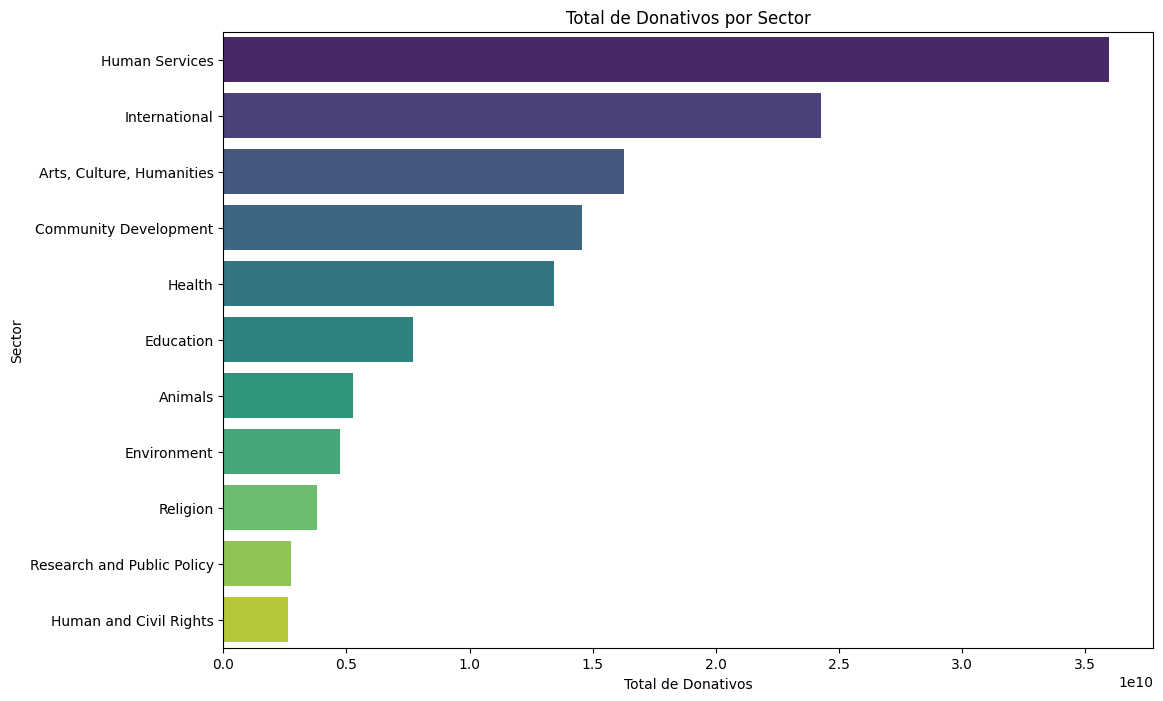

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columna 'category' para el sector y 'tot_rev' para el total de donativos
sector_donativos = df.groupby('category')['tot_rev'].sum().sort_values(ascending=False).reset_index()

# Gráfica de barras con diferentes colores
plt.figure(figsize=(12, 8))
sns.barplot(data=sector_donativos, y='category', x='tot_rev', hue='category', palette="viridis", dodge=False, legend=False)
plt.title('Total de Donativos por Sector')
plt.xlabel('Total de Donativos')
plt.ylabel('Sector')
plt.show()


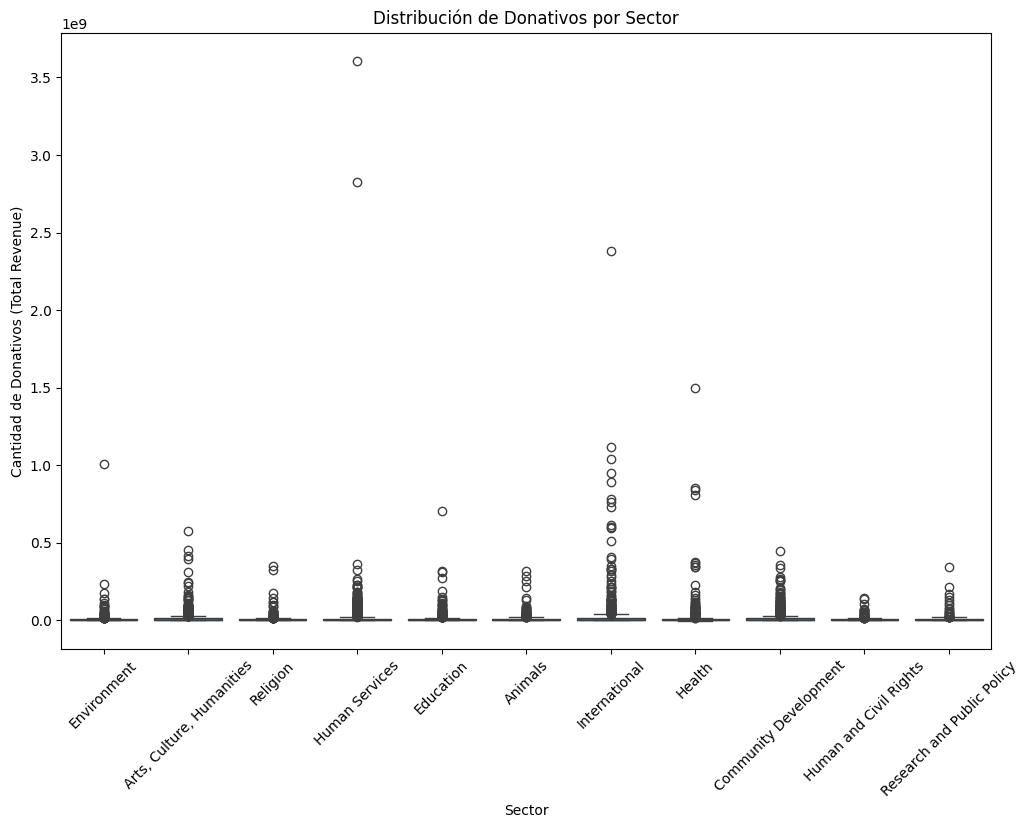

In [79]:
# Gráficos de caja y bigote para identificar la distribución de los donativos por sector y categoría

# Distribución de donativos por sector
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='tot_rev', data=df)
plt.xticks(rotation=45)
plt.title('Distribución de Donativos por Sector')
plt.xlabel('Sector')
plt.ylabel('Cantidad de Donativos (Total Revenue)')
plt.show()


**4. Instituciones que reciben los mayores donativos**
> * American Red Cross: 3.6 mil millones
* Feeding America: 2.8 mil millones
* Americares: 2.4 mil millones
* Dana-Farber Cancer Institute: 1.5 mil millones
* Direct Relief: 1.1 mil millones


In [70]:
# Suma de donativos por institución
institucion_donativos = df.groupby('name')['tot_rev'].sum().sort_values(ascending=False)

# Mostrar las 5 instituciones con mayores donaciones
institucion_donativos.head()


,tot_rev
name,
American Red Cross,3.608002e+09
Feeding America,2.827633e+09
Americares,2.380434e+09
Dana-Farber Cancer Institute,1.495111e+09
Direct Relief,1.114257e+09


**5. Gastos de recaudación de fondos entre organizaciones grandes y pequeñas**

> Se comprueba que el gasto es polarizado y significativo con aproximadamente 1.6 millones comparado con 200 mil en las organizaciones pequeñas.

<ipython-input-72-41c4d498d5d0>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gastos_por_categoria = df.groupby('size_category')['fund_exp'].mean()


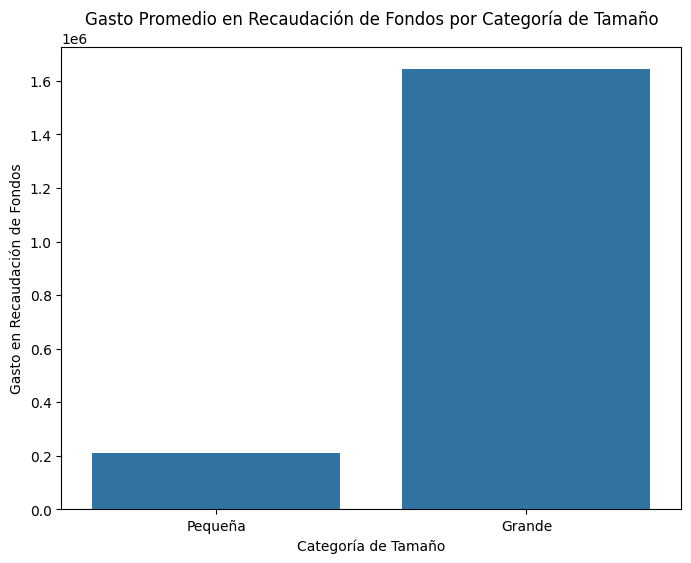

,fund_exp
size_category,
Pequeña,2.085556e+05
Grande,1.643614e+06


In [72]:
# Definir categoría de tamaño según ingresos: 'Pequeña' (< mediana), 'Grande' (>= mediana)
df['size_category'] = pd.cut(df['tot_rev'], bins=[0, df['tot_rev'].median(), df['tot_rev'].max()], labels=['Pequeña', 'Grande'])

# Promedio de gastos en recaudación por categoría de tamaño
gastos_por_categoria = df.groupby('size_category')['fund_exp'].mean()

# Visualización de los gastos de recaudación de fondos por categoría de tamaño
plt.figure(figsize=(8, 6))
sns.barplot(x=gastos_por_categoria.index, y=gastos_por_categoria.values)
plt.title('Gasto Promedio en Recaudación de Fondos por Categoría de Tamaño')
plt.xlabel('Categoría de Tamaño')
plt.ylabel('Gasto en Recaudación de Fondos')
plt.show()

gastos_por_categoria


**6. Distribución de donativos por tamaño de la organización.**

> Se comprueba que las organizaciones más grandes reciben mayores ingresos en donaciones


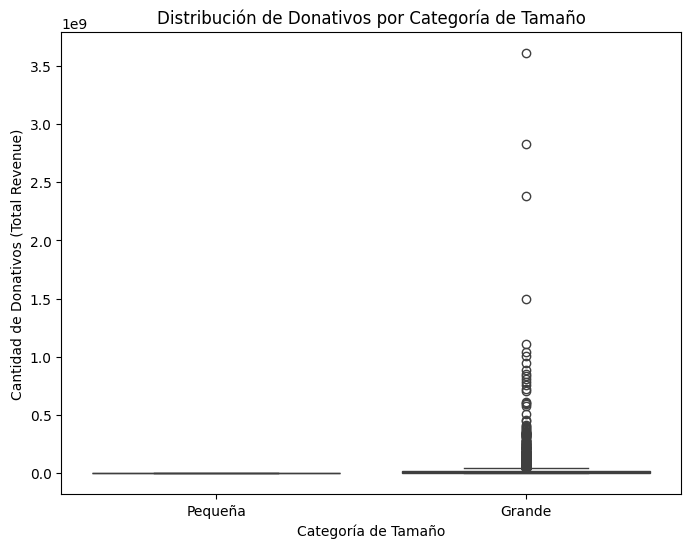

In [80]:

# Distribución de donativos por tamaño de la organización
plt.figure(figsize=(8, 6))
sns.boxplot(x='size_category', y='tot_rev', data=df)
plt.title('Distribución de Donativos por Categoría de Tamaño')
plt.xlabel('Categoría de Tamaño')
plt.ylabel('Cantidad de Donativos (Total Revenue)')
plt.show()

**7. Análisis de correlación entre el puntaje financiero y el puntaje de responsabilidad, seguido de una prueba de hipótesis para evaluar la relación**

> Muestra una relación positiva fuerte (0.82) entre el puntaje financiero y el puntaje de responsabilidad. La matriz de correlación también revela una correlación significativa entre varias variables financieras, particularmente entre ingresos, gastos, y los puntajes.

In [73]:
from scipy.stats import pearsonr

# Calcular la correlación entre puntaje financiero y puntaje de responsabilidad
correlation, p_value = pearsonr(df['fscore'], df['score'])

# Mostrar resultados de la correlación y el p-valor
correlation, p_value


(0.8203249511290983, 0.0)

8. **Resultados encontrados en la Matriz de Correlación con diversas variables**

> **Ingresos y Gastos Altamente Correlacionados:** Las organizaciones que tienen mayores ingresos también tienen mayores gastos, especialmente en programas. Esto indica que una parte significativa de los ingresos se invierte directamente en la misión principal de las organizaciones.

> **Fuerte Relación entre Puntaje Financiero y Puntaje de Responsabilidad:** La alta correlación entre estos puntajes muestra que las organizaciones con una buena situación financiera también tienden a gestionar sus recursos de manera responsable.

> **Gastos en Recaudación y Eficiencia de Donativos:** La correlación entre gastos de recaudación y total de ingresos sugiere que invertir en recaudación de fondos puede ser una estrategia efectiva, ya que las organizaciones que gastan más en captar donativos tienden a recibir mayores aportaciones.

> **Gastos Administrativos y Tamaño de la Organización:** Las organizaciones más grandes, con más ingresos y gastos, también tienden a tener mayores costos administrativos y de recaudación, lo que refleja una estructura organizacional más compleja.

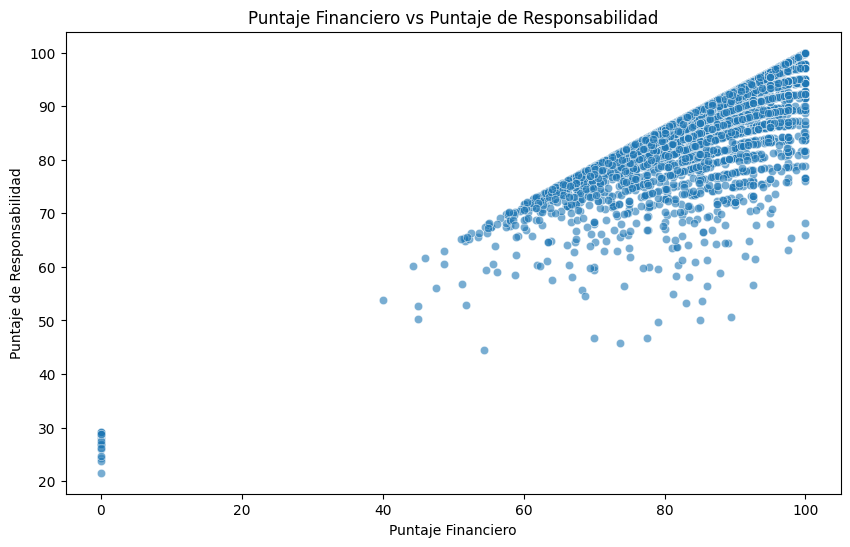

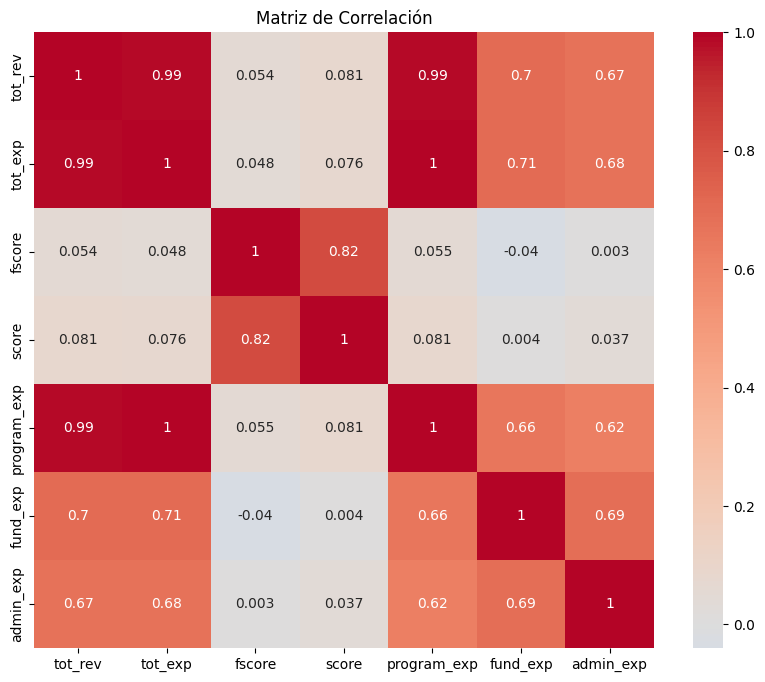

In [74]:
# Visualización de la relación entre puntaje financiero y puntaje de responsabilidad
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fscore', y='score', data=df, alpha=0.6)
plt.title('Puntaje Financiero vs Puntaje de Responsabilidad')
plt.xlabel('Puntaje Financiero')
plt.ylabel('Puntaje de Responsabilidad')
plt.show()

# Matriz de correlación para las principales variables
correlation_matrix = df[['tot_rev', 'tot_exp', 'fscore', 'score', 'program_exp', 'fund_exp', 'admin_exp']].corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()


#**Modelo Predictivo**

> Se entrenó un modelo de regresión lineal con el objetivo de predecir los ingresos de las organizaciones (tot_rev) usando variables relacionadas con el desempeño y los gastos de las organizaciones. El modelo usa como variables independientes:

* **fscore:** Puntaje financiero, que refleja la salud económica de la organización.
* **score:** Puntaje de responsabilidad, que mide la gestión y el cumplimiento de la misión de la organización.
* **program_exp:** Gastos en programas, que representan cuánto invierte la organización en sus actividades de misión.
* **fund_exp:** Gastos en recaudación de fondos, que muestran cuánto se gasta para captar donativos.
* **admin_exp:** Gastos administrativos, que representan el costo de mantener la estructura organizacional.

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selección de variables independientes y la variable objetivo (total de donativos)
X = df[['fscore', 'score', 'program_exp', 'fund_exp', 'admin_exp']]
y = df['tot_rev']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones y evaluación del modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(138263310807447.95, 0.9885598894206638)

**9. Resultados del Modelo de Regresión Lineal**


> **El modelo produjo dos resultados:**
* **Intercepto:** 138263310807447.95
* **Coeficiente de determinación (R²):** 0.9886

Lo que se traduce en:

* El modelo tiene un excelente ajuste a los datos, ya que un R² de 0.9886 indica que el modelo puede explicar la mayor parte de la variabilidad en los ingresos.
* El modelo es confiable para predecir los ingresos de las organizaciones en función de las variables seleccionadas.
* Este resultado también indica que casi no hay otros factores importantes que afecten los ingresos que no estén representados en estas variables, lo que refuerza la utilidad del modelo para comprender los factores que influyen en los ingresos de las organizaciones.

**Se integró Random Forest y Gradient Boosting como ensambles de árboles de decisión, además de una red neuronal simple para observar patrones complejos en los datos.**

**10. Integración de Modelos Avanzados:**

> Después del modelo inicial de regresión lineal, se implementaron modelos avanzados de aprendizaje automático para mejorar la precisión de las predicciones. Entre estos, se incluyeron Random Forest, Gradient Boosting y una Red Neuronal Artificial (ANN), diseñados para capturar patrones más complejos en los datos.

**Resultados Comparativos:**

 * **Random Forest:** Alcanzó un R2 de 0.8802, explicando el 88.02% de la variabilidad en los ingresos. Aunque es un buen resultado, los errores (MSE y MAE) muestran que aún existe margen de mejora.

 * **Gradient Boosting:** Mejoró el rendimiento con un R2 de 0.9436 y redujo considerablemente los errores, lo que evidencia una mayor capacidad para modelar relaciones complejas.

 * **Red Neuronal Artificial (ANN):** Logró un R2 de 0.9905, explicando el 99.05% de la variabilidad en los ingresos. También obtuvo los valores más bajos de MSE y MAE, lo cual indica una alta precisión en las predicciones.


**Conclusiones del modelo:**

> La Red Neuronal Artificial (ANN) resultó ser el modelo más efectivo para el análisis, logrando capturar relaciones no lineales y patrones complejos que los otros modelos no pudieron. Esto permite predecir los ingresos con una alta precisión, aspecto fundamental para la planificación y toma de decisiones estratégicas en organizaciones sin fines de lucro.

**Implicaciones:**

> **Estrategia Organizacional:** Las organizaciones pueden aplicar estos hallazgos para optimizar sus gastos en programas, recaudación y administración, lo cual contribuiría a mejorar su puntaje financiero y de responsabilidad.

> **Futuras Investigaciones:** Se sugiere profundizar en el análisis de las contribuciones individuales de cada variable y considerar la inclusión de variables adicionales que puedan influir en los ingresos.



In [81]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

# Dividir los datos en conjuntos de entrenamiento y prueba (reutilizando X y y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo Random Forest
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

# Evaluación del modelo Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Modelo Gradient Boosting
gradient_boost = GradientBoostingRegressor(n_estimators=100, random_state=42)
gradient_boost.fit(X_train, y_train)
y_pred_gb = gradient_boost.predict(X_test)

# Evaluación del modelo Gradient Boosting
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Red Neuronal Artificial (ANN) con MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(50, 30), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

# Evaluación del modelo MLP
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

# Resultados de los tres modelos
results = {
    "Random Forest": {"MSE": mse_rf, "MAE": mae_rf, "R2": r2_rf},
    "Gradient Boosting": {"MSE": mse_gb, "MAE": mae_gb, "R2": r2_gb},
    "ANN (MLP)": {"MSE": mse_mlp, "MAE": mae_mlp, "R2": r2_mlp}
}

results


{'Random Forest': {'MSE': 1448294489809164.0,
  'MAE': 3634003.2188002514,
  'R2': 0.8801659744866487},
 'Gradient Boosting': {'MSE': 682111527984232.8,
  'MAE': 3218882.686827905,
  'R2': 0.9435610845566469},
 'ANN (MLP)': {'MSE': 115295595814058.33,
  'MAE': 2468869.1231167945,
  'R2': 0.9904602720872193}}

**11. Validación del modelo**

> Para asegurar la confiabilidad del modelo, se realizó una validación cruzada, dividiendo los datos en múltiples partes y evaluando el modelo en diferentes subconjuntos. Los resultados promedio de la validación cruzada mostraron:

* **Un MSE promedio de 163,528,316,796,925.2**, lo que indica que los errores de predicción son bajos.
* **Un MAE promedio de 2,574,468.24**, lo que sugiere que las predicciones del modelo presentan una desviación pequeña en comparación con los valores reales.
* **Un R2 promedio de 0.9696**, confirmando que el modelo puede explicar el 96.96% de la variabilidad en los ingresos de las organizaciones de manera confiable.

> Estos resultados muestran que el modelo generaliza bien en diferentes subconjuntos de los datos, evidenciando consistencia y evitando el sobreajuste. En conclusión, la validación cruzada confirma que el modelo es robusto y altamente preciso para predecir los ingresos de las organizaciones.

In [84]:
pip install scikit-learn


In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.neural_network import MLPRegressor

# Configurar el MLPRegressor (ANN) como el mejor modelo encontrado
mlp = MLPRegressor(hidden_layer_sizes=(50, 30), max_iter=1000, random_state=42)

# Crear métricas para la validación cruzada
mse_scorer = make_scorer(mean_squared_error)
mae_scorer = make_scorer(mean_absolute_error)
r2_scorer = make_scorer(r2_score)

# Realizar validación cruzada
cv_mse = cross_val_score(mlp, X, y, cv=5, scoring=mse_scorer)
cv_mae = cross_val_score(mlp, X, y, cv=5, scoring=mae_scorer)
cv_r2 = cross_val_score(mlp, X, y, cv=5, scoring=r2_scorer)

# Promedio de las métricas
validation_results = {
    "Mean MSE": cv_mse.mean(),
    "Mean MAE": cv_mae.mean(),
    "Mean R2": cv_r2.mean()
}

print("Resultados de Validación Cruzada:")
print(validation_results)


Resultados de Validación Cruzada:
{'Mean MSE': 163528316796925.2, 'Mean MAE': 2574468.2407590044, 'Mean R2': 0.9695935603413437}


> Error Cuadrático Medio (MSE), Error Absoluto Medio (MAE) y el Coeficiente de Determinación (R²) promedios en 5 pliegues de validación cruzada

# **Presentación / Dashboard**

> Se realizó un dashboard para la visualización del modelo predictivo en Streamlit. Se incluye en Github

# **Conclusiones**

> Este proyecto analizó los factores que impactan los ingresos de las organizaciones sin fines de lucro, permitiendo comprender mejor cómo los gastos en recaudación de fondos, los gastos en programas, los gastos administrativos y los puntajes financieros y de responsabilidad se relacionan con la captación de donativos.

* **Análisis Exploratorio:** El análisis de correlación reveló que los ingresos de las organizaciones están fuertemente ligados a los gastos en programas y recaudación, así como a los puntajes de responsabilidad financiera. Esto sugiere que una buena gestión de recursos y una inversión estratégica en actividades de recaudación están asociadas con mayores ingresos.

* **Modelos Predictivos:** Se desarrollaron y compararon varios modelos, incluyendo Random Forest, Gradient Boosting y una Red Neuronal Artificial (ANN). La ANN resultó ser el modelo más preciso, logrando un R² de 0.99, lo que indica que es altamente eficaz para predecir los ingresos en función de los factores evaluados.

* **Validación del Modelo:** La validación cruzada confirmó que el modelo es robusto y generalizable, lo que refuerza su capacidad para predecir ingresos de organizaciones en contextos nuevos.

* **Aplicación Práctica:** Este modelo proporciona una herramienta útil para las organizaciones, permitiéndoles anticipar sus ingresos y tomar decisiones informadas sobre cómo distribuir sus recursos en recaudación, programas y administración para maximizar el impacto.

> En resumen, el proyecto no solo ofrece un modelo predictivo preciso, sino también valiosos insights sobre las estrategias financieras y operativas que pueden influir en el éxito financiero de las organizaciones sin fines de lucro.

# **Referencias**

* Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. O'Reilly Media, Inc.
* Google LLC. (2021). Google Colaboratory.
* Joblib Development Team. (2021). Joblib: a set of tools to provide lightweight pipelining in Python.
* Kaggle. (2021). Dataset: Charity Navigator Dataset.
* McKinney, W. (2010). Data structures for statistical computing in Python. In Proceedings of the 9th Python in Science Conference (Vol. 445, pp. 51–56).
* Pedregosa, F., et al. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825–2830.
* Streamlit Inc. (2020). Streamlit: The fastest way to build and share data apps.

# **Vídeo de presentación**

> Realizado por medio de Zoom.
Disponible en: